In [31]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv

In [32]:

from scipy.io import loadmat

In [33]:
mnist = loadmat('MNIST.mat')

# Read the train set
training_samples = mnist['x_train']
# Read the train labels
training_labels = mnist['trainlabels']

# Read the test set
test_samples = mnist['x_test']
# Read the test labels
test_labels = mnist['testlabels']

# We select only the data for three classes that we want to classify

num_classes = 5   # Number of classes (i.e. numbers) we want to be able to classify

training_indices = []
test_indices = []

for i in range(num_classes):
    
    # Find the indexes of the training set corresponding to class i
    training_index = np.where(training_labels == i)[0]
    # Find the indexes of the test set corresponding to class i
    test_index = np.where(test_labels == i)[0]
    
    # Append the training indexes in a list
    training_indices.append(training_index)
    # Append the testing indexes in a list
    test_indices.append(test_index)

# Reshape the lists to be a 1-d array (rather than lists of arrays, just one big array)
training_indices = np.concatenate(training_indices, axis=0)
test_indices = np.concatenate(test_indices, axis=0)

# Create a training set and a test set with data belonging to the classes considered only
training_samples = np.copy(training_samples[training_indices, :])
test_samples = np.copy(test_samples[test_indices, :])

# Compute the size of the train and test datasets
training_size = np.shape(training_indices)[0]
test_size = np.shape(test_indices)[0]

# Create one-hot encoding labels for train and test datasets
desired_outputs_training = np.zeros([training_size, num_classes])
desired_outputs_test = np.zeros([test_size, num_classes])

for i in range(training_size):

    desired_outputs_training[i, int(training_labels[training_indices[i]])] = 1

for i in range(test_size):

    desired_outputs_test[i, int(test_labels[test_indices[i]])] = 1

num_samples, img_size = training_samples.shape

/var/folders/jd/bpt85r9d2sx4bggpw3wbs6k00000gn/T/ipykernel_51927/115668758.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  desired_outputs_training[i, int(training_labels[training_indices[i]])] = 1
/var/folders/jd/bpt85r9d2sx4bggpw3wbs6k00000gn/T/ipykernel_51927/115668758.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  desired_outputs_test[i, int(test_labels[test_indices[i]])] = 1


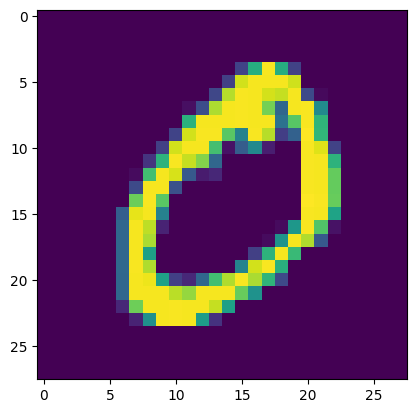

In [34]:
# Example of image, take the transpose to see it in the right orientation
example_image = np.reshape(training_samples[0], (28,28))
plt.imshow(example_image.T)
plt.show()

In [35]:
num_epochs = 10
batch_size = 20
num_batches = int(math.floor(num_samples / batch_size))

# define the size of each of the layers in the network
size_input_layer  = img_size
size_hidden_layer = 100
size_output_layer = num_classes

# Add another hidden layer
n_hidden_layer2 = 100 # number of neurons of the hidden layer. 0 deletes this layer

# eta is the learning rate
eta = 0.05

In [36]:
# Initialize a simple network

W1 = np.random.uniform(0, 1, (size_hidden_layer, size_input_layer))
W2 = np.random.uniform(0, 1, (size_output_layer, size_hidden_layer))

# The following normalises the random weights so that the sum of each row =1
W1 = np.divide(W1, np.matlib.repmat(np.sum(W1, 1)[:, None], 1, size_input_layer))
W2 = np.divide(W2, np.matlib.repmat(np.sum(W2, 1)[:, None], 1, size_hidden_layer))

In [37]:
# Initialize the biases
biases_W1 = np.zeros((size_hidden_layer,))
biases_W2 = np.zeros((size_output_layer,))

In [38]:
# Keep track of the network inputs and average error per epoch
errors = np.zeros((num_epochs,))

In [39]:
# Train the network

for i in range(0, num_epochs):

    # We will shuffle the order of the samples each epoch
    shuffled_indices = np.random.permutation(num_samples)
    
    for batch in range(0, num_batches):
        
        # Initialise the gradients for each batch
        W1_gradient = np.zeros(W1.shape)
        W2_gradient = np.zeros(W2.shape)

        bias_W1_gradient = np.zeros(biases_W1.shape)
        bias_W2_gradient = np.zeros(biases_W2.shape)
        
    
        # Loop over all the samples in the batch
        for j in range(0, batch_size):

            # Input (random element from the dataset)
            index = shuffled_indices[batch * batch_size + j]
            activations_input = training_samples[index]
            
            # Neural activation: input layer -> hidden layer
            weighted_sums_hidden = np.dot(W1, activations_input) + biases_W1

            # Apply the sigmoid function
            activations_hidden = 1 / (1 + np.exp(-weighted_sums_hidden))

            # Neural activation: hidden layer -> output layer
            weighted_sums_output = np.dot(W2, activations_hidden) + biases_W2

            # Apply the sigmoid function
            activations_output = 1 / (1 + np.exp(-weighted_sums_output))

            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = desired_outputs_training[index]

            # Compute the error signal
            error = desired_output - activations_output

            # Backpropagation: output layer -> hidden layer
            delta_output = activations_output * (1 - activations_output) * error
            W2_gradient += np.outer(delta_output, activations_hidden)

            # Backpropagation: hidden layer -> input layer
            delta_hidden = activations_hidden * (1 - activations_hidden) * np.dot(W2.T, delta_output)
            W1_gradient += np.outer(delta_hidden, activations_input)

            # Store the error per epoch (iterative mean update)
            errors[i] = errors[i] + 0.5 * np.sum(np.square(error))/ num_samples

        # After each batch update the weights using accumulated gradients
        W2 += eta * dW2 / batch_size
        W1 += eta * dW1 / batch_size
        
    print( "Epoch ", i+1, ": error = ", errors[i])

NameError: name 'x_train' is not defined